<h1><center>Hedge Funds and Alternative Investments</center></h1>
<h1><center>— Problem Set 10 —</center></h1>

_In problems 10.1-10.7, you backtest the currency carry trade using the data provided in the Excel
spreadsheet for this problem set._

## 10.1 Investment currencies and funding currencies*

For each month of the sample, rank the countries based on their interest rate. Compute
each country’s average rank (1=lowest interest rate, etc.). <br>

&nbsp; &nbsp; &nbsp; a. Which country has the lowest average rank, i.e., most often “funding currency” with the lowest interest rate? <br>
&nbsp; &nbsp; &nbsp; b. Which country is the second to most often funding currency (second lowest average rank)? <br>
&nbsp; &nbsp; &nbsp; c. Which country is most often “investment currency,” i.e. highest average rank? <br>
&nbsp; &nbsp; &nbsp; d. Which country is second to most often investment currency? <br>
&nbsp; &nbsp; &nbsp; e. Plot here the rank of the US over time. <br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file = "PS_10_Global_Macro.xlsx"

In [3]:
xrets = pd.read_excel(file, sheet_name="excess_returns", parse_dates=["date"], index_col="date")
xrets.head()

,Australia,Germany / Euro,Canada,Japan,New Zealand,Sweden,Switzerland,UK,US
date,,,,,,,,,
1979-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-31,-0.000444,-0.012384,0.005701,-0.002052,-0.001362,-0.006747,-0.025869,0.023979,0.0
1980-02-29,-0.011935,-0.024018,0.012533,-0.050103,-0.015811,-0.014158,-0.046015,0.007125,0.0
1980-03-31,-0.019402,-0.096527,-0.045007,-0.005098,-0.035265,-0.065007,-0.093389,-0.049313,0.0
1980-04-30,0.026340,0.074189,0.005215,0.043219,0.022791,0.055034,0.096164,0.045273,0.0


The DataFrame contains the excess return of an investment of 1 USD in foreign currency over the US risk free rate (not annualized) for a 1-month investment period ENDING on date.

In [4]:
rates = pd.read_excel(file, sheet_name="interest_rates", parse_dates=["date"], index_col="date")
rates.head()

,Australia,Germany / Euro,Canada,Japan,New Zealand,Sweden,Switzerland,UK,US
date,,,,,,,,,
1979-12-31,0.1005,0.086875,0.13875,0.081250,0.116737,0.105295,0.058125,0.171250,0.146824
1980-01-31,0.1015,0.085000,0.14125,0.082500,0.120640,0.100520,0.054375,0.178750,0.145024
1980-02-29,0.1005,0.092500,0.14125,0.094375,0.120755,0.110779,0.057500,0.183750,0.172524
1980-03-31,0.1298,0.102500,0.15625,0.121875,0.121786,0.101899,0.071250,0.187500,0.198724
1980-04-30,0.1313,0.093750,0.15250,0.123750,0.120869,0.099783,0.061250,0.173125,0.141824


The DataFrame contains the annualized interest rate as of date.

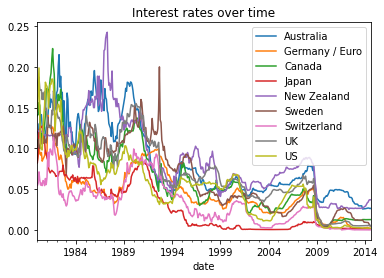

In [5]:
rates.plot()
plt.title("Interest rates over time")
plt.show()

In [6]:
tc = pd.read_excel(file, sheet_name="transaction_costs").iloc[0,:]

The Series contains proportional transaction costs for each currency.

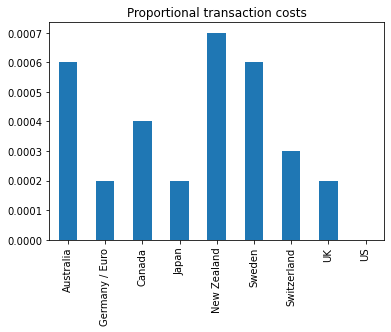

In [7]:
tc.plot.bar()
plt.title("Proportional transaction costs")
plt.show()

Computing ranks can be done easily using Pandas "rank" method: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rank.html <br>
The "method" argument is relevant if groups of records have the same value (there is no right or wrong regarding this choice - you can just stick to the default).

In [8]:
ranks = rates.rank(axis=1, method="min")
round(ranks.mean().sort_values(), 2)

Japan             1.74
Switzerland       1.91
Germany / Euro    3.80
US                4.47
Canada            5.35
Sweden            5.82
UK                6.65
Australia         7.51
New Zealand       7.71
dtype: float64

__Results:__
<ul>
    <li>Japan has the lowest average rank (i.e. it is most often a funding currency)</li>
    <li>Switzerland has the second lowest average rank</li>
    <li>New Zealand is most often investment currency, i.e highest average rank</li>
    <li>Australia is second to most often investment currency</li>
</ul>

Plot here the rank of the US over time:

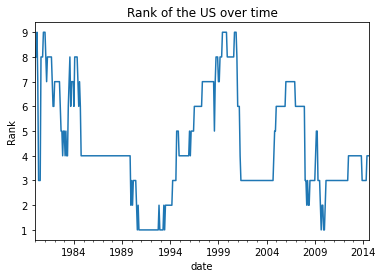

In [9]:
ranks.loc[:,"US"].plot()
plt.ylabel("Rank")
plt.title("Rank of the US over time")
plt.show()

As you can see, the rank of the US does not fluctuate strongly over time. Changes occur rather slowly, causing relatively little turnover.

## 10.2 Carry positions*

Create positions for each currency, either 1 USD (long), -1 USD (short), or 0 (flat). Do this by
going short the three currencies with the lowest interest rate, and long the three with
the highest interest rate.
What is the average position in New Zealand dollars?

In [10]:
# create boolean mask
low = ranks < 4
medium = (ranks > 3) & (ranks < 7)
high = ranks > 6

In [11]:
# copy DataFrame and then overwrite values
positions = ranks.copy()
positions[low] = -1
positions[medium] = 0
positions[high] = 1

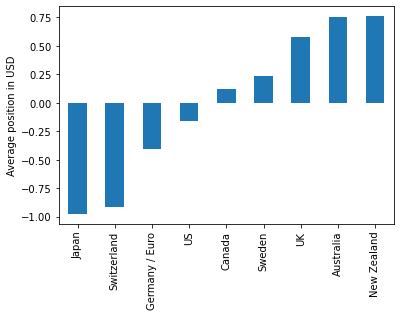

In [12]:
positions.mean().sort_values().plot.bar()
plt.ylabel("Average position in USD")
plt.show()

In [13]:
print("Average position in New Zealand:", positions.loc[:,"New Zealand"].mean())

Average position in New Zealand: 0.7607655502392344


## 10.3 Carry trade return*

Compute the excess return on each position, and add these up to get the excess return of the entire portfolio in any month. Make sure to get the timing right. (Hint: use SKEW and KURT, and annualize as in notes.) <br>

&nbsp; &nbsp; &nbsp; a. What is the annualized average excess return of the portfolio? <br>
&nbsp; &nbsp; &nbsp; b. What is the annualized standard deviation? <br>
&nbsp; &nbsp; &nbsp; c. What is the annualized SR? <br>
&nbsp; &nbsp; &nbsp; d. What is the skewness of monthly returns? <br>
&nbsp; &nbsp; &nbsp; e. What is the (excess) kurtosis of monthly return? <br>
&nbsp; &nbsp; &nbsp; f. Comment on these numbers. <br>

In [14]:
def performance_statistics(rets):
    
    # compute summary statistics
    stats = pd.Series([rets.mean() * 12,                              # annualized average return
                       rets.std() * np.sqrt(12),                      # annualized standard deviation
                       rets.mean() / rets.std() * np.sqrt(12),        # annualized sharpe ratio
                       rets.skew(),                                   # skewness of returns
                       rets.kurt()],                                  # kurtosis of returns
                      index=["Avg ret", "Std", "SR", "Skew", "Kurt"])
    
    # format in percent
    for stat in ["Avg ret", "Std"]: stats.loc[stat] = "{0:.2f}%".format(stats.loc[stat] * 100)
    
    # round to two decimals
    for stat in ["SR", "Skew", "Kurt"]: stats.loc[stat] = round(stats.loc[stat], 2)

    return stats

**Important:** use the position at the RIGHT time, that is, position based on interest-rate known **BEFORE** the return period starts

In [15]:
carry_xrets = positions.shift() * xrets
carry_xrets.head()

,Australia,Germany / Euro,Canada,Japan,New Zealand,Sweden,Switzerland,UK,US
date,,,,,,,,,
1979-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-31,-0.0,0.012384,0.005701,0.002052,-0.0,-0.000000,0.025869,0.023979,0.0
1980-02-29,-0.0,0.024018,0.012533,0.050103,-0.0,-0.000000,0.046015,0.007125,0.0
1980-03-31,-0.0,0.096527,-0.045007,0.005098,-0.0,-0.000000,0.093389,-0.049313,0.0
1980-04-30,0.0,-0.074189,0.005215,0.000000,0.0,-0.055034,-0.096164,0.045273,0.0


In [16]:
portfolio_xrets = carry_xrets.sum(axis=1, min_count=1)

In [17]:
# print performance statistics for the carry portfolio
performance_statistics(portfolio_xrets)

Avg ret    15.15%
Std        28.74%
SR           0.53
Skew        -1.07
Kurt         2.76
dtype: object

__Comments:__
<ul>
    <li>This simple strategy achieved high returns and Sharpe Ratio</li>
    <li>Skewness and kurtosis indicate significant crash risk</li>
</ul>

## 10.4 Transaction costs*

For each currency, compute the trade each month, that is, the change in position. (Position this month minus last month.) Assuming that the transaction costs are proportional as given in the sheet, compute the transaction costs for each currency. Add up the transaction costs to get the total transaction costs. Subtract total transaction costs from the portfolio’s excess return to get the return net of trading costs.

&nbsp; &nbsp; &nbsp; a. What is the annualized average net return of the portfolio? <br>
&nbsp; &nbsp; &nbsp; b. What is the annualized net SR? <br>
&nbsp; &nbsp; &nbsp; c. Why is the effect of transaction costs so modest in this case? <br>
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Do you think that this is typical of all trading strategies? <br>
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Under which circumstances might a global macro trader incur larger transaction costs in connection with the currency carry trade?

Positions after one month are the invested amounts times their return:

In [31]:
us_rate = (rates.loc[:,"US"] / 12)
rets = xrets.add(us_rate.shift(), axis=0)
positions_dev = positions.shift() * (1 + rets)
positions_dev = positions_dev.fillna(0)
positions_dev

,Australia,Germany / Euro,Canada,Japan,New Zealand,Sweden,Switzerland,UK,US
date,,,,,,,,,
1979-12-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1980-01-31,0.000000,-0.999852,1.017936,-1.010183,0.000000,0.000000,-0.986366,1.036214,1.012235
1980-02-29,0.000000,-0.988068,1.024618,-0.961983,0.000000,0.000000,-0.966070,1.019211,1.012085
1980-03-31,0.000000,-0.917850,0.969370,-1.009279,0.000000,0.000000,-0.920988,0.965064,1.014377
1980-04-30,0.000000,-1.090749,1.021775,0.000000,0.000000,-1.071594,-1.112724,1.061833,1.016560
...,...,...,...,...,...,...,...,...,...
2014-05-30,1.005780,0.000000,1.012588,-1.004922,0.992063,0.000000,-0.982342,0.000000,-1.000186
2014-06-30,1.014060,0.000000,1.016634,-1.003923,1.034244,0.000000,-1.007792,0.000000,-1.000190
2014-07-31,0.991203,-0.979955,0.979926,-0.985755,0.973239,0.000000,-0.978627,0.000000,0.000000


To compute trade sizes, compare positions after one month with the new positions given by the carry strategy:

In [30]:
trade_sizes = (positions_dev - positions).abs()
trade_sizes

,Australia,Germany / Euro,Canada,Japan,New Zealand,Sweden,Switzerland,UK,US
date,,,,,,,,,
1979-12-31,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
1980-01-31,0.000000,0.000148,0.017936,0.010183,0.000000,0.000000,0.013634,0.036214,0.012235
1980-02-29,0.000000,0.011932,0.024618,0.038017,0.000000,0.000000,0.033930,0.019211,0.012085
1980-03-31,0.000000,0.082150,0.030630,1.009279,0.000000,1.000000,0.079012,0.034936,0.014377
1980-04-30,0.000000,0.090749,0.021775,0.000000,0.000000,0.071594,0.112724,0.061833,0.016560
...,...,...,...,...,...,...,...,...,...
2014-05-30,0.005780,0.000000,0.012588,0.004922,0.007937,0.000000,0.017658,0.000000,0.000186
2014-06-30,0.014060,1.000000,0.016634,0.003923,0.034244,0.000000,0.007792,0.000000,1.000190
2014-07-31,0.008797,0.020045,0.020074,0.014245,0.026761,0.000000,0.021373,0.000000,0.000000


Transaction costs are proportional to the change in position. Total costs at each point in time are the sum of costs occuring for each trade:

In [20]:
total_costs = (trade_sizes.shift() * tc).sum(axis=1)

In [21]:
avg_costs = total_costs.mean() * 12
print("Average annual transaction costs:", "{0:.2f}%".format(avg_costs * 100))

Average annual transaction costs: 0.33%


In [22]:
portfolio_xrets_net_tc = portfolio_xrets - total_costs

In [23]:
performance_statistics(portfolio_xrets_net_tc.iloc[1:])

Avg ret    14.82%
Std        28.75%
SR           0.52
Skew        -1.07
Kurt         2.77
dtype: object

Transaction costs are so modest because...
<ul>
    <li> ... currency markets are very liquid. <br>
    <li> ... carry trade has low turnover (interest rates are very persistent).
</ul>
    
High transaction costs might occur...
<ul>
    <li> ... during a liquidity crisis (pressure to unwind positions). <br>
    <li> ... when trading illiquid currencies.
</ul>

## 10.5 High water mark*

Compute the portfolio’s total return including the US risk free rate, but net of transaction costs (i.e. add the annual US interest rate divided by 12 to the portfolio’s return). Next, compute the cumulative return, assuming you start with 1 USD, and then keep reinvesting all profits/losses. Further, compute the high water mark as the maximum cumulative return from the first date to the current date. Make a plot with both the cumulative return and the high water mark.

In [24]:
# return of portfolio, incl. US riskfree, net of TC
portfolio_rets_net_tc = portfolio_xrets_net_tc + us_rate.shift()

In [25]:
# cumulative return of portfolio, net of TC
cum_rets_net_tc = (1 + portfolio_rets_net_tc).cumprod()

In [26]:
# high water mark
hwm = cum_rets_net_tc.expanding().max()

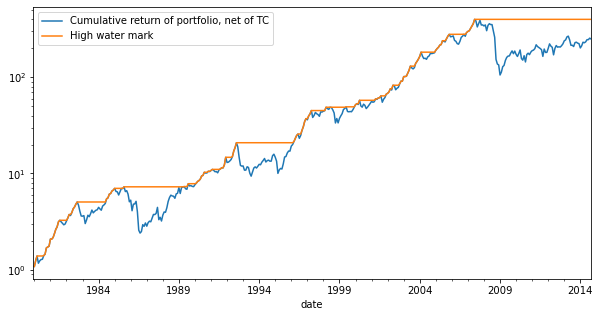

In [27]:
# make a plot
cum_rets_net_tc.plot(logy=True, figsize=(10, 5), label="Cumulative return of portfolio, net of TC")
hwm.plot(label="High water mark")
plt.legend()
plt.show()

## 10.6 Drawdown*

Compute and plot the drawdown, $ DD_t = \frac{\text{HWM}_t − P_t}{\text{HWM}_t} $, where $P$ is the cumulative return and $\text{HWM}$ is the high water mark.

In [28]:
# compute the drawdown
dd = (hwm - cum_rets_net_tc) / hwm

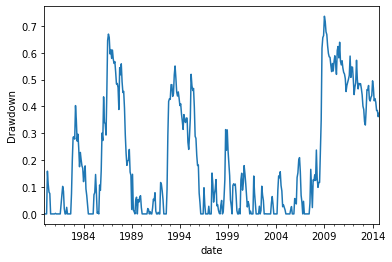

In [29]:
# make a plot
dd.plot()
plt.ylabel("Drawdown")
plt.show()

<b>"The carry trade goes up by the stairs and down by the elevator."</b><br>
$\rightarrow$ Many small profits and episodic large losses<br>
$\rightarrow$ Large potential losses if the exchange rate moves against you

## 10.7 Timing the carry trade*

Suggest a way of dynamically timing the carry trade (that is, increasing and decreasing the position sizes over time) that might improve the performance of the strategy and / or reduce the drawdowns.

Macro traders might time the carry trade by trying to:
<ul>
    <li>earn carry in calm times.</li>
    <li>unwind positions when market volatility increases.</li>
</ul>

This idea has two main shortcomings:
<ul>
    <li>Not all carry traders will be able to unwind before the others (risk of a "carry unwind").</li>
    <li>Times of high risk may also be times of opportunity.</li>
</ul>

To determine risk and expected return, macro traders may look at volatility, change in volatility, past returns, or more fundamental factors such as the currency valuations (e.g., vs. PPP), currency reserves, trade surplus, or sovereign risk.